In [1]:
# US temperature data analysis 1850 - 2013

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[6,4]
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the main dataset
global_temps = pd.read_csv('GlobalTemperatures.csv')

In [4]:
# Overview of the data
global_temps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
global_temps.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

Renaming the columns

In [6]:
global_temps.columns = ['Date', 'AverageTemp', 'LandAverageTemperatureUncertainty',
       'MaxTemp', 'LandMaxTemperatureUncertainty',
       'MinTemp', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']

In [7]:
global_temps.head()

,Date,AverageTemp,LandAverageTemperatureUncertainty,MaxTemp,LandMaxTemperatureUncertainty,MinTemp,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


Delete unnecessary columns from dataframe

In [8]:
global_temps = global_temps.drop(
    ['LandAverageTemperatureUncertainty',
      'LandMaxTemperatureUncertainty',
      'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'], axis = 1)

In [9]:
#Checking the new dataframe

In [10]:
global_temps.head()

,Date,AverageTemp,MaxTemp,MinTemp
0,1750-01-01,3.034,NaN,NaN
1,1750-02-01,3.083,NaN,NaN
2,1750-03-01,5.626,NaN,NaN
3,1750-04-01,8.490,NaN,NaN
4,1750-05-01,11.573,NaN,NaN


In [11]:
global_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3192 non-null   object 
 1   AverageTemp  3180 non-null   float64
 2   MaxTemp      1992 non-null   float64
 3   MinTemp      1992 non-null   float64
dtypes: float64(3), object(1)
memory usage: 99.9+ KB


In [12]:
global_temps.describe()

,AverageTemp,MaxTemp,MinTemp
count,3180.000000,1992.000000,1992.000000
mean,8.374731,14.350601,2.743595
std,4.381310,4.309579,4.155835
min,-2.080000,5.900000,-5.407000
25%,4.312000,10.212000,-1.334500
50%,8.610500,14.760000,2.949500
75%,12.548250,18.451500,6.778750
max,19.021000,21.320000,9.715000


In [13]:
global_temps.head()

,Date,AverageTemp,MaxTemp,MinTemp
0,1750-01-01,3.034,NaN,NaN
1,1750-02-01,3.083,NaN,NaN
2,1750-03-01,5.626,NaN,NaN
3,1750-04-01,8.490,NaN,NaN
4,1750-05-01,11.573,NaN,NaN


In [14]:
#removing the NaN values
global_temps = global_temps.dropna()

In [15]:
global_temps.head()

,Date,AverageTemp,MaxTemp,MinTemp
1200,1850-01-01,0.749,8.242,-3.206
1201,1850-02-01,3.071,9.970,-2.291
1202,1850-03-01,4.954,10.347,-1.905
1203,1850-04-01,7.217,12.934,1.018
1204,1850-05-01,10.004,15.655,3.811


In [16]:
# fix form Date data type
global_temps['Date']=pd.to_datetime(global_temps['Date'])



In [17]:
global_temps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1992 non-null   datetime64[ns]
 1   AverageTemp  1992 non-null   float64       
 2   MaxTemp      1992 non-null   float64       
 3   MinTemp      1992 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 77.8 KB


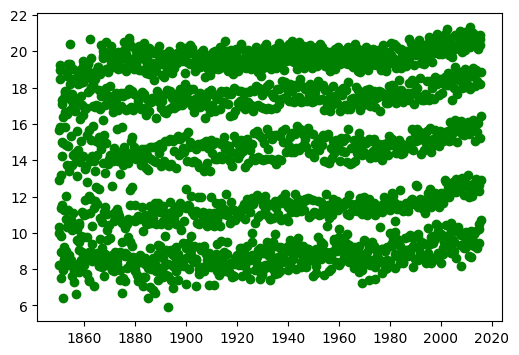

In [18]:
# Quick plot to get the general oveview of the data
# Monthly data over time
plt.scatter(x= global_temps['Date'], y=global_temps['MaxTemp'], color='green')
plt.show()

In [19]:
#displays ALL the rows
pd.set_option('display.max_rows',None)

In [20]:
global_temps.head(10)

,Date,AverageTemp,MaxTemp,MinTemp
1200,1850-01-01,0.749,8.242,-3.206
1201,1850-02-01,3.071,9.970,-2.291
1202,1850-03-01,4.954,10.347,-1.905
1203,1850-04-01,7.217,12.934,1.018
1204,1850-05-01,10.004,15.655,3.811
1205,1850-06-01,13.150,18.946,7.106
1206,1850-07-01,14.492,19.233,8.014
1207,1850-08-01,14.039,18.477,7.406
1208,1850-09-01,11.505,15.846,4.533
1209,1850-10-01,8.091,13.189,2.013


In [21]:
# Adds new collumns for year, month number, month name, and day
global_temps['Year']=global_temps['Date'].dt.year
global_temps['Month']=global_temps['Date'].dt.month
global_temps['Day']=global_temps['Date'].dt.day
global_temps['Month_Name']=global_temps['Date'].dt.month_name()


In [22]:
# Makes it so we only get the first three letters of the month name
global_temps['Month_Name']=global_temps['Month_Name'].str.slice(0,3)

In [23]:
global_temps.head(10)

,Date,AverageTemp,MaxTemp,MinTemp,Year,Month,Day,Month_Name
1200,1850-01-01,0.749,8.242,-3.206,1850,1,1,Jan
1201,1850-02-01,3.071,9.970,-2.291,1850,2,1,Feb
1202,1850-03-01,4.954,10.347,-1.905,1850,3,1,Mar
1203,1850-04-01,7.217,12.934,1.018,1850,4,1,Apr
1204,1850-05-01,10.004,15.655,3.811,1850,5,1,May
1205,1850-06-01,13.150,18.946,7.106,1850,6,1,Jun
1206,1850-07-01,14.492,19.233,8.014,1850,7,1,Jul
1207,1850-08-01,14.039,18.477,7.406,1850,8,1,Aug
1208,1850-09-01,11.505,15.846,4.533,1850,9,1,Sep
1209,1850-10-01,8.091,13.189,2.013,1850,10,1,Oct


In [24]:
# Create separate dataframes for january and july data
july_temps = global_temps.loc[global_temps['Month']==7]
jan_temps = global_temps.loc[global_temps['Month']==1]

In [25]:
july_temps.head(10)

,Date,AverageTemp,MaxTemp,MinTemp,Year,Month,Day,Month_Name
1206,1850-07-01,14.492,19.233,8.014,1850,7,1,Jul
1218,1851-07-01,14.531,17.103,7.425,1851,7,1,Jul
1230,1852-07-01,14.512,17.795,7.570,1852,7,1,Jul
1242,1853-07-01,14.645,18.923,6.933,1853,7,1,Jul
1254,1854-07-01,14.692,20.426,7.890,1854,7,1,Jul
1266,1855-07-01,13.926,18.467,7.691,1855,7,1,Jul
1278,1856-07-01,14.019,18.349,7.035,1856,7,1,Jul
1290,1857-07-01,13.953,18.717,7.438,1857,7,1,Jul
1302,1858-07-01,13.677,18.561,7.888,1858,7,1,Jul
1314,1859-07-01,13.827,19.444,7.850,1859,7,1,Jul


In [26]:
jan_temps.head(10)

,Date,AverageTemp,MaxTemp,MinTemp,Year,Month,Day,Month_Name
1200,1850-01-01,0.749,8.242,-3.206,1850,1,1,Jan
1212,1851-01-01,2.431,8.951,-2.443,1851,1,1,Jan
1224,1852-01-01,2.376,8.474,-2.755,1852,1,1,Jan
1236,1853-01-01,1.786,8.972,-2.818,1853,1,1,Jan
1248,1854-01-01,1.281,8.786,-3.552,1854,1,1,Jan
1260,1855-01-01,2.522,8.220,-3.125,1855,1,1,Jan
1272,1856-01-01,2.760,7.298,-3.727,1856,1,1,Jan
1284,1857-01-01,1.821,6.642,-5.407,1857,1,1,Jan
1296,1858-01-01,2.739,9.044,-2.692,1858,1,1,Jan
1308,1859-01-01,2.015,8.074,-2.700,1859,1,1,Jan


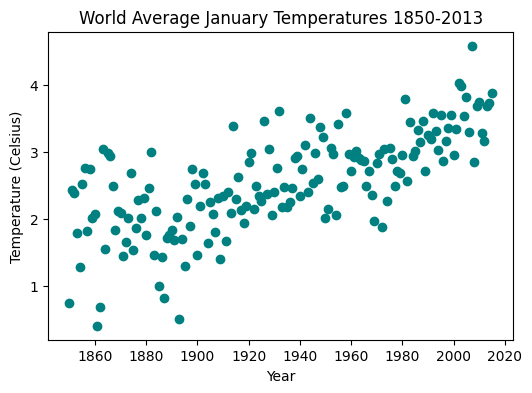

In [27]:
# Scatter plot showing only the months of Jan
plt.scatter(x= jan_temps['Date'], y=jan_temps['AverageTemp'], color='teal')
plt.title("World Average January Temperatures 1850-2013")
plt.xlabel("Year")
plt.ylabel('Temperature (Celsius)')
plt.show()

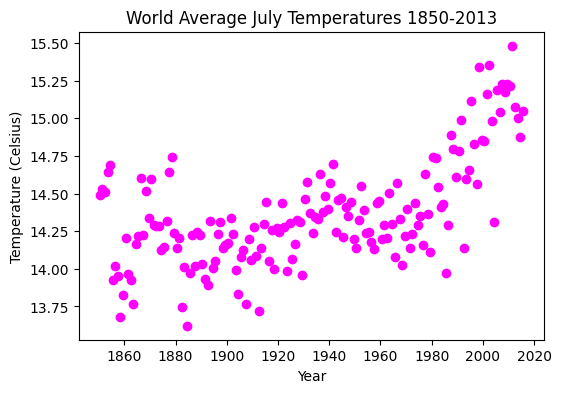

In [28]:
# Scatter plot showing only the months of Jan
plt.scatter(x= july_temps['Date'], y=july_temps['AverageTemp'], color='magenta')
plt.title("World Average July Temperatures 1850-2013")
plt.xlabel("Year")
plt.ylabel('Temperature (Celsius)')
plt.show()

In [29]:
global_temps.head()

,Date,AverageTemp,MaxTemp,MinTemp,Year,Month,Day,Month_Name
1200,1850-01-01,0.749,8.242,-3.206,1850,1,1,Jan
1201,1850-02-01,3.071,9.970,-2.291,1850,2,1,Feb
1202,1850-03-01,4.954,10.347,-1.905,1850,3,1,Mar
1203,1850-04-01,7.217,12.934,1.018,1850,4,1,Apr
1204,1850-05-01,10.004,15.655,3.811,1850,5,1,May


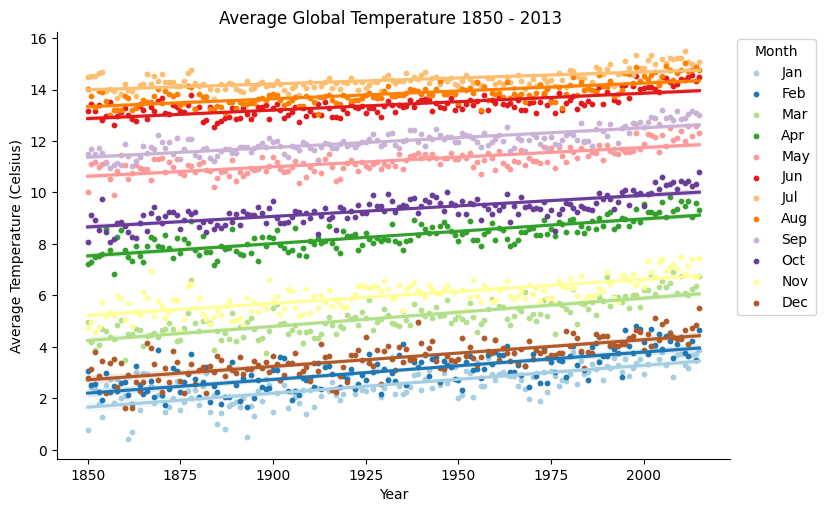

In [30]:
# lmplot to show trends for all months
Months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
custom_palette = sns.color_palette("Paired", 12)
vis1 = sns.lmplot(data=global_temps, x ='Year', y='AverageTemp', hue='Month_Name', palette=custom_palette, aspect = 1.5, legend=False, scatter_kws={"s":10, "alpha":1})
plt.ylabel("Average Temperature (Celsius)")
plt.title("Average Global Temperature 1850 - 2013 ")
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()

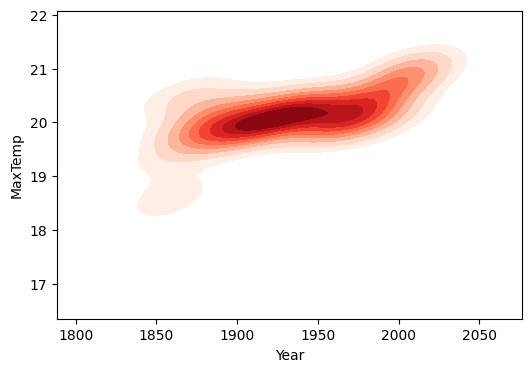

In [31]:
# Quick plot to get review max temp data
vis2 = sns.kdeplot(data=july_temps, x="Year", y='MaxTemp', shade=True, cmap='Reds', thresh=0.1)
plt.show()

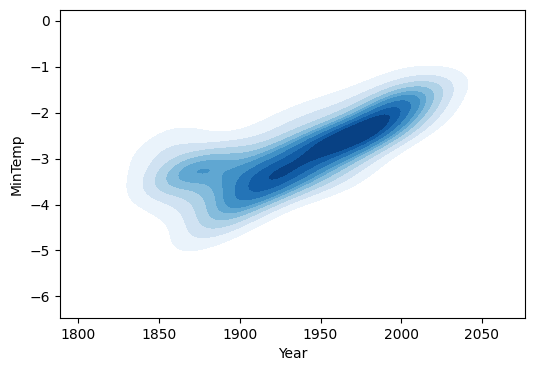

In [32]:
# Quick plot to get review max temp data
vis3 = sns.kdeplot(data=jan_temps, x="Year", y='MinTemp', shade=True, cmap='Blues', thresh=0.1)
plt.show()

In [33]:
global_temps.head()


,Date,AverageTemp,MaxTemp,MinTemp,Year,Month,Day,Month_Name
1200,1850-01-01,0.749,8.242,-3.206,1850,1,1,Jan
1201,1850-02-01,3.071,9.970,-2.291,1850,2,1,Feb
1202,1850-03-01,4.954,10.347,-1.905,1850,3,1,Mar
1203,1850-04-01,7.217,12.934,1.018,1850,4,1,Apr
1204,1850-05-01,10.004,15.655,3.811,1850,5,1,May


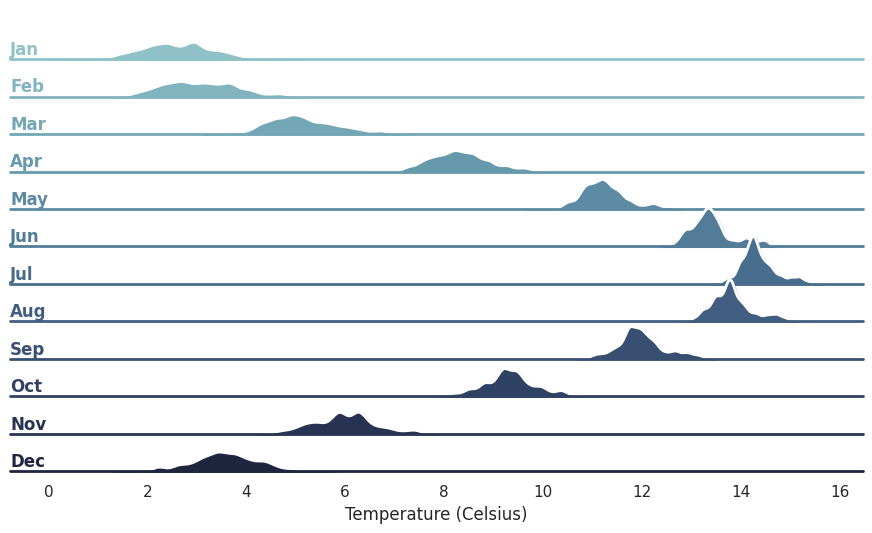

In [34]:
# Ridge plot for months and average temperatures

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
x = global_temps['AverageTemp']
g = global_temps['Month_Name']
df = pd.DataFrame(dict(x=x, g=g))


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(12, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=22, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")



# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)


# Fixes the x-axis label
last_ax = g.axes.flat[-1]
last_ax.set_xlabel("Temperature (Celsius)")


plt.show()


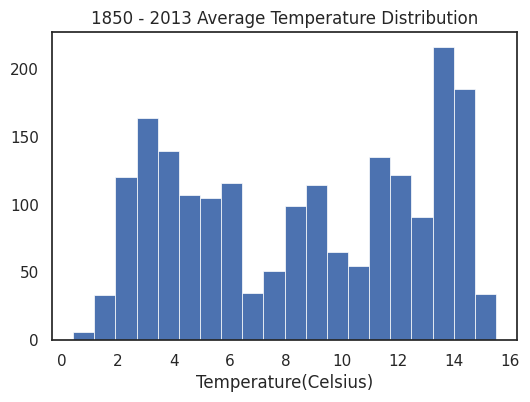

In [35]:
# Distribution plot


# make data
x = global_temps['AverageTemp']


# plot:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(x, bins=20, linewidth=0.5, edgecolor="white")
ax.set_xlabel('Temperature(Celsius)')
ax.title.set_text('1850 - 2013 Average Temperature Distribution')

plt.show()

In [36]:
import plotly.express as px

# Import data from GitHub
city_temps = pd.read_csv('GlobalLandTemperaturesByMajorCity1.csv')

In [37]:
# removes NaN values and unneeded collumn
city_temps = city_temps.drop('AverageTemperatureUncertainty', axis =1)
city_temps = city_temps.dropna()

In [38]:
city_temps.head()

,dt,AverageTemperature,City,Country,Latitude,Longitude
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [39]:
# fix form Date data type
city_temps['dt']=pd.to_datetime(city_temps['dt'])

In [40]:
city_temps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228175 entries, 0 to 239175
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   dt                  228175 non-null  datetime64[ns]
 1   AverageTemperature  228175 non-null  float64       
 2   City                228175 non-null  object        
 3   Country             228175 non-null  object        
 4   Latitude            228175 non-null  object        
 5   Longitude           228175 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 12.2+ MB


In [41]:
city_temps['Year']=city_temps['dt'].dt.year
city_temps['Month']=city_temps['dt'].dt.month
city_temps['Day']=city_temps['dt'].dt.day

In [42]:
city_temps.head()

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month,Day
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,1
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,1


In [43]:
# Create separate dataframes for january and july data
july_city_temps = city_temps.loc[(city_temps['Month']==7) & (city_temps['Year']>=1900)]


In [44]:
july_city_temps = july_city_temps.sort_values('Year')

In [45]:
min_temp = july_city_temps['AverageTemperature'].min()
max_temp = july_city_temps['AverageTemperature'].max()

# Set a fixed midpoint value for the color scale
midpoint = (min_temp + max_temp) / 2

# Create basic choropleth map
fig = px.choropleth(july_city_temps, locations='Country',
                    locationmode ='country names',
                    color='AverageTemperature',
                    hover_name='City',
                    projection='natural earth',
                    title='Average July Temperature 1900-2013',
                    animation_frame='Year',
                    height = 600,
                    width = 1000,
                      color_continuous_midpoint=midpoint
                    )
fig.show()
